In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
N = 150
noises = 0.05
random_state = 42

X_circle,y_circle = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

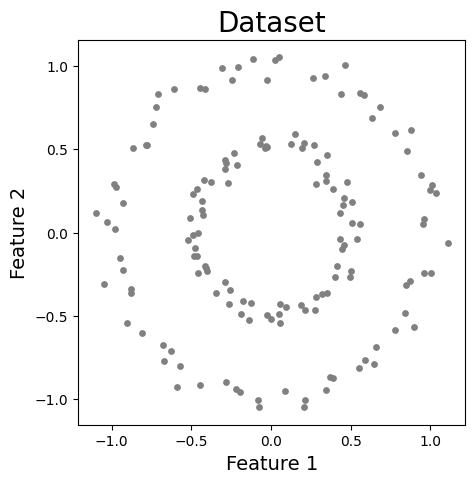

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X_circle[:,0],X_circle[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

single_clustering = linkage(X_circle,
                            method="single",
                            metric="euclidean")

In [6]:
print(type(single_clustering))
print(single_clustering.shape)

<class 'numpy.ndarray'>
(149, 4)


In [8]:
dist=single_clustering[:,2]

The graph shows the dependence of the distances between clusters on the merge (backward) step. On the graph we find the moment from which the distance stops changing significantly.

Text(1, 0.21, '2 cluster')

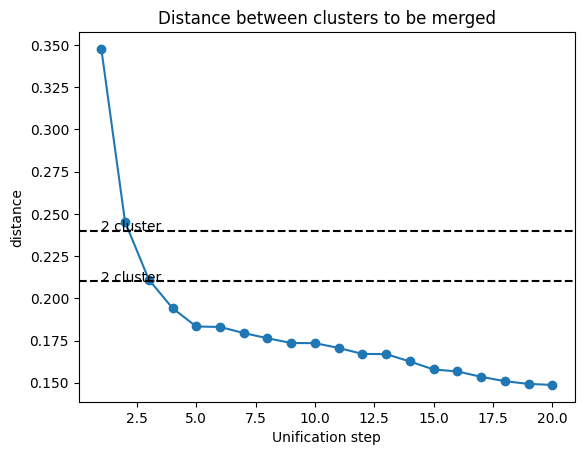

In [34]:
dist_rev = dist[::-1]
dist_rev=dist_rev[:20]
idxs = range(1, 21)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between clusters to be merged')
plt.xlabel('Unification step')
plt.ylabel('distance')
plt.axhline(0.24, c='k', linestyle='dashed')
plt.text(1, 0.24, '2 cluster')
plt.axhline(0.21, c='k', linestyle='dashed')
plt.text(1, 0.21, '2 cluster')

point - 2.5

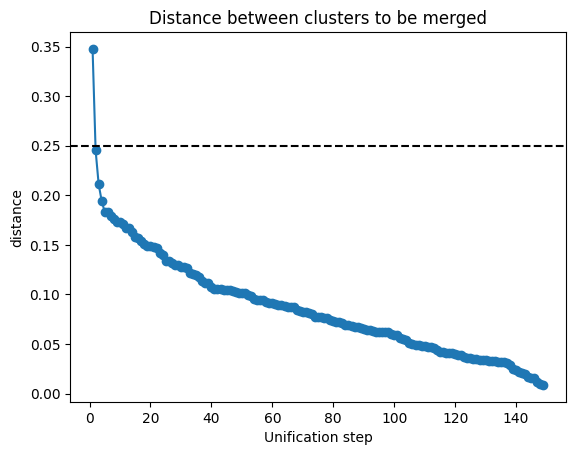

In [32]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between clusters to be merged')
plt.xlabel('Unification step')
plt.ylabel('distance')
plt.axhline(0.25, c='k', linestyle='dashed')

In [35]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_circle, linkagefun=lambda x: single_clustering,
                                                          color_threshold = 0.25,
                                                          labels= y_circle)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [36]:
# Determine clusters using a distance threshold (you can adjust 't' value based on dendrogram)
clusters = fcluster(single_clustering, t=0.25, criterion='distance')

# Plot the circular data with cluster assignments
fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=clusters.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (Single Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()